# Ensure SerpAPI is imported

In [ ]:
!pip install google-search-results

  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32010 sha256=f748ee62645d88e55f3def51ceedba0a69f152ed9dc8f83a65bc5afaae51e913
  Stored in directory: /root/.cache/pip/wheels/6e/42/3e/aeb691b02cb7175ec70e2da04b5658d4739d2b41e5f73cd06f
Successfully built google-search-results


# Initial JSON interpreting (not important)

In [ ]:
from serpapi import GoogleSearch
search = GoogleSearch({
    "q": "graphics cards",
    "location": "United States",
    "api_key": "b484735aff7d4281635c4e98dabddeb9e8fff811b87264da95c846d48386e966"
  })
result = search.get_dict()
for item in result["immersive_products"]:
  print(item['title'])
  if 'rating' in item:
    print('Rating:', item['rating'])
  else:
    print('no ratings found')
  if 'reviews' in item:
    print('No. of reviews:', item['reviews'])
  else:
    print('no reviews found')
  print(item['price'], '\n')

Gigabyte Radeon RX 9060 XT GAMING OC Graphics Card
Rating: 4.8
No. of reviews: 64
$299.99 

Nvidia GeForce RTX 5090 32gb Gddr7 Graphics Card
Rating: 4.5
No. of reviews: 228
$2,895.00 

XFX Swift Radeon RX 9060 XT OC Triple Fan Gaming Edition Graphics Card
Rating: 4.9
No. of reviews: 36
$379.99 

Gigabyte Radeon RX 9070 XT Gaming OC 16G Graphics Card 16GB GDDR6 256bit
Rating: 4.3
No. of reviews: 281
$729.99 

PNY GeForce RTX 5060 Ti 8GB OC Graphics Card
no ratings found
no reviews found
$368.55 

MSI GeForce RTX 3050 Gaming X Graphics Card
Rating: 4.7
No. of reviews: 134
$199.99 

Gigabyte GeForce RTX 5060 Ti Gaming OC Graphics Card
Rating: 4.7
No. of reviews: 28
$409.99 

MSI GeForce RTX 3060 Ventus 2X OC 12GB GDDR6 Graphics Card
Rating: 4.8
No. of reviews: 1700
$299.97 

Sapphire PULSE AMD Radeon RX 9060 XT Gaming OC Graphics Card GDDR6 11350-03-20G
Rating: 4.9
No. of reviews: 68
$299.99 

PNY NVIDIA GeForce RTX 5070 Triple Fan Graphic Card VCG507012TFXPB1
Rating: 4.5
No. of reviews: 

# Graphics Cards Price Comparison
What are the prices of some of the most popular graphics cards?

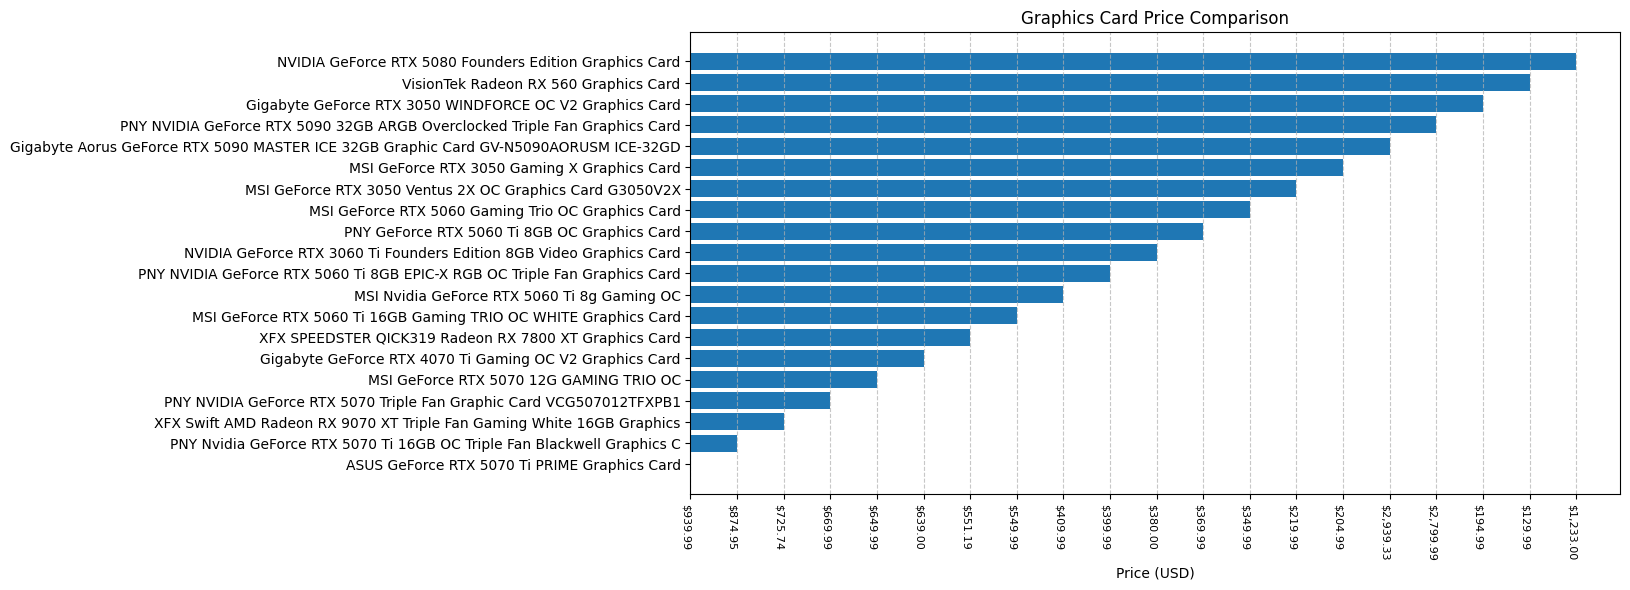

In [ ]:
from serpapi import GoogleSearch
import pandas as pd
import matplotlib.pyplot as plt

# Get data from SerpAPI
search = GoogleSearch({
    "q": "graphics cards",
    "location": "United States",
    "api_key": "b484735aff7d4281635c4e98dabddeb9e8fff811b87264da95c846d48386e966"
})
result = search.get_dict()

# Make lists for product info
titles = []
prices = []

for item in result.get("immersive_products", []):
    title = item.get('title', 'No Title')
    price = item.get('price', None)

    if price is not None:
        titles.append(title)
        prices.append(price)

df = pd.DataFrame({
    'Graphics Card': titles,
    'Price (USD)': prices
})

df = df.sort_values(by='Price (USD)', ascending=False)

# Graph results
plt.figure(figsize=(12, 6))
bars = plt.barh(df['Graphics Card'], df['Price (USD)'])
# Format x-axis labels
plt.xticks(rotation=270, ha='right', fontsize=8)
plt.xlabel('Price (USD)')
plt.title('Graphics Card Price Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()